# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('geo (2).csv', delimiter=';')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [35]:
# XX = data[["x", "y"]]
# X = XX[:5000]
X = data[["x", "y"]]
X.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.34290757,  0.47862927],
       [ 0.34290757,  0.47862927],
       [ 0.22674566, -0.12707229],
       ...,
       [-0.5549076 ,  0.05102584],
       [-0.5549076 ,  0.05102584],
       [-0.5549076 ,  0.05102584]])

In [34]:
# yy = data["comment_class"]
# y = yy[:5000]
y = data["comment_class"]
y = np.array(y)
y

array([-1, -1, -1, ...,  1, -1, -1], dtype=int64)

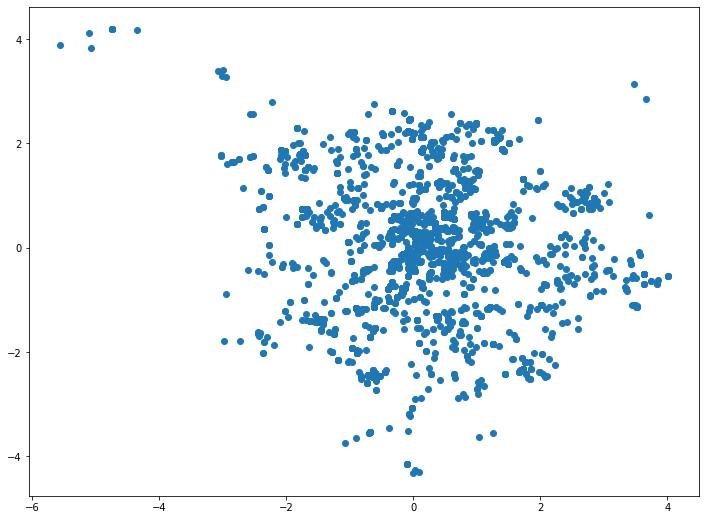

In [36]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn')#c=y, 
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans

In [33]:
# from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
# Z = linkage(X_scaled, 'ward')

In [31]:
# plt.figure(figsize=(12,9))
# dendrogram(Z)
# plt.show()

In [95]:
# clustering = AgglomerativeClustering(n_clusters=5, linkage='single')
clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_pred = clustering.fit_predict(X_scaled)

In [85]:
# scan = DBSCAN(eps=0.3)
# y_pred = scan.fit_predict(X_scaled)

In [93]:
clf_kmeans = KMeans(n_clusters=6)
y_pred = clf_kmeans.fit_predict(X_scaled)

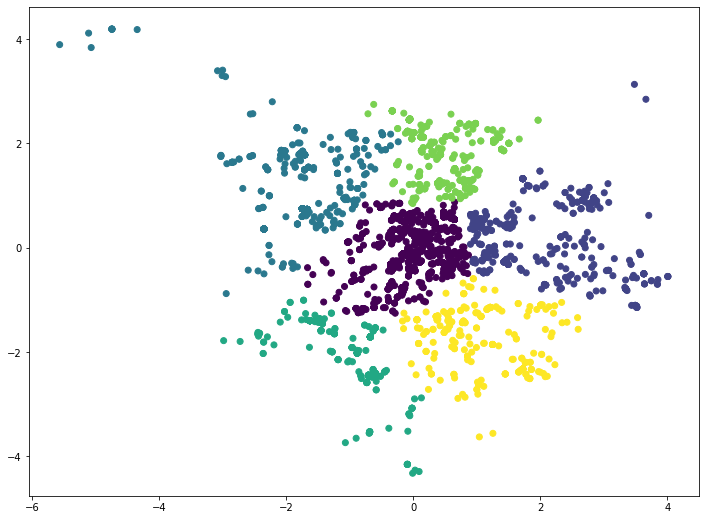

In [96]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.show()

In [52]:
data_pros = data[data['comment_class']==1]
data_cons = data[data['comment_class']==-1]
data_cons.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [53]:
X_pros = data_pros[["x", "y"]]
X_cons = data_cons[["x", "y"]]
X_cons.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [54]:
y_pros = data_pros["comment_class"]
y_cons = data_cons["comment_class"]
y_cons.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: comment_class, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [55]:
X_pros_scaled = scaler.fit_transform(X_pros)
X_cons_scaled = scaler.fit_transform(X_cons)
X_cons_scaled

array([[ 0.43002964,  0.19265922],
       [ 0.43002964,  0.19265922],
       [ 0.35337802, -0.31003917],
       ...,
       [-1.4874462 ,  1.92227958],
       [-0.94787529,  0.4146822 ],
       [-0.92484113,  1.03413074]])

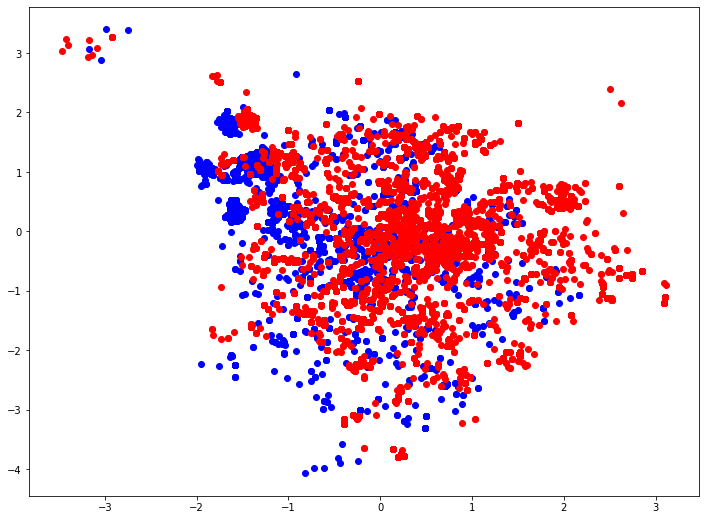

In [66]:
plt.figure(figsize=(12,9))
plt.scatter(X_pros_scaled[:, 0], X_pros_scaled[:, 1], c='b', cmap='autumn')#c=y, 
plt.scatter(X_cons_scaled[:, 0], X_cons_scaled[:, 1],  c='r', cmap='autumn')#c=y, 
plt.show()

Сеты "за" и "против" съехали друг относительно друга, поскольку скалер проводился отдельно

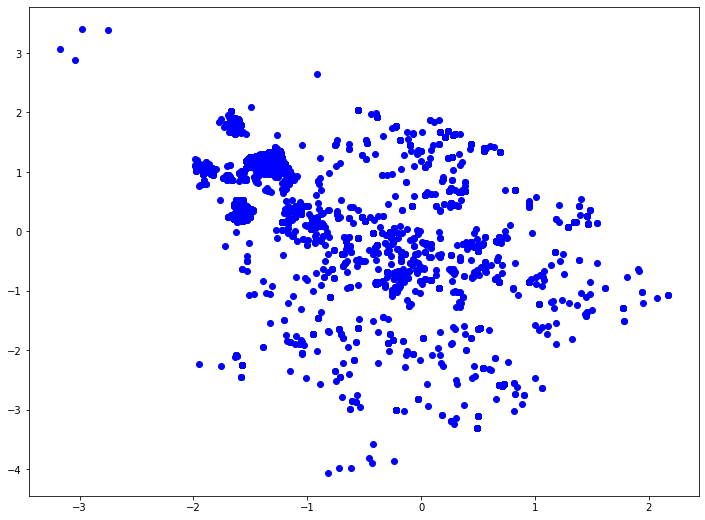

In [64]:
plt.figure(figsize=(12,9))
plt.scatter(X_pros_scaled[:, 0], X_pros_scaled[:, 1], c='b', cmap='autumn')#c=y,  
plt.show()

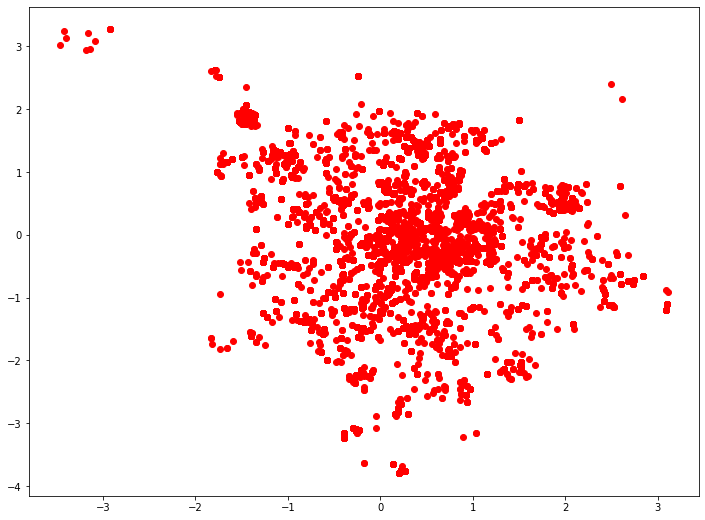

In [65]:
plt.figure(figsize=(12,9))
plt.scatter(X_cons_scaled[:, 0], X_cons_scaled[:, 1], c='r', cmap='autumn')#c=y, 
plt.show()

Подбор количества кластеров

In [70]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

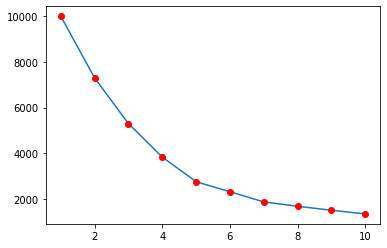

In [71]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [72]:
diff = np.diff(k_inertia)

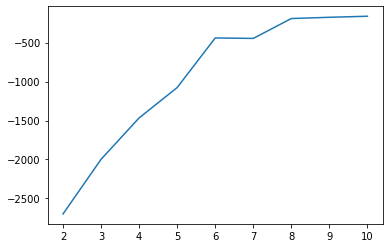

In [73]:
plt.plot(ks[1:], diff)

In [75]:
diff_r = diff[1:] / diff[:-1]

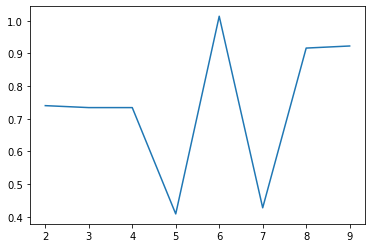

In [76]:
plt.plot(ks[1:-1], diff_r)

In [77]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

5